In [1]:
from keras.datasets import imdb


(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [2]:
import numpy as np


def vectorize_sequences(sequences, demension=10000):
    results = np.zeros((len(sequences), demension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results


x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [3]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [4]:
from keras import models
from keras import layers


model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model1 = models.Sequential()
model1.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model1.add(layers.Dense(1, activation='sigmoid'))

model3 = models.Sequential()
model3.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model3.add(layers.Dense(16, activation='relu'))
model3.add(layers.Dense(16, activation='relu'))
model3.add(layers.Dense(1, activation='sigmoid'))

model32 = models.Sequential()
model32.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model32.add(layers.Dense(32, activation='relu'))
model32.add(layers.Dense(1, activation='sigmoid'))

model64 = models.Sequential()
model64.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model64.add(layers.Dense(64, activation='relu'))
model64.add(layers.Dense(1, activation='sigmoid'))

modelmse = models.Sequential()
modelmse.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
modelmse.add(layers.Dense(16, activation='relu'))
modelmse.add(layers.Dense(1, activation='sigmoid'))

modeltanh = models.Sequential()
modeltanh.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
modeltanh.add(layers.Dense(16, activation='tanh'))
modeltanh.add(layers.Dense(1, activation='sigmoid'))

models = {
    'origin': model,
    'layer1': model1,
    'layer3': model3,
    'unit32': model32,
    'unit64': model64,
    'mse': modelmse,
    'tanh': modeltanh
}

2022-07-20 11:45:18.392553: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-20 11:45:18.395117: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [5]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics='accuracy')
model1.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics='accuracy')
model3.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics='accuracy')
model32.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics='accuracy')
model64.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics='accuracy')
modelmse.compile(optimizer='rmsprop', loss='mse', metrics='accuracy')
modeltanh.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics='accuracy')

In [6]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
historys = {}
for k, v in models.items():
    history = v.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))
    historys[k] = history

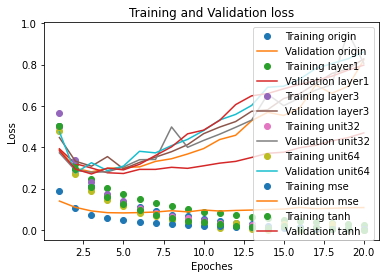

In [12]:
import matplotlib.pyplot as plt


epochs = range(1, 21)

for k, v in historys.items():
    history = v.history
    
    loss_values = history['loss']
    val_loss_values = history['val_loss']

    plt.plot(epochs, loss_values, 'o', label='Training {}'.format(k))
    plt.plot(epochs, val_loss_values, '', label='Validation {}'.format(k))

plt.title('Training and Validation loss')
plt.xlabel('Epoches')
plt.ylabel('Loss')
plt.legend()
plt.show()

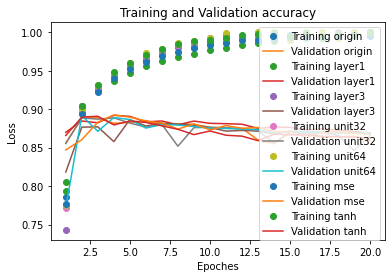

In [14]:
plt.clf()

for k, v in historys.items():
    history = v.history
    
    acc_values = history['accuracy']
    val_acc_values = history['val_accuracy']

    plt.plot(epochs, acc_values, 'o', label='Training {}'.format(k))
    plt.plot(epochs, val_acc_values, '', label='Validation {}'.format(k))

plt.title('Training and Validation accuracy')
plt.xlabel('Epoches')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [15]:
results = {}
for k, v in models.items():
    result = v.evaluate(x_test, y_test)
    results[k] = result

for k, v in results.items():
    print(k, v)

782/782 [==============================] - 11s 14ms/step - loss: 0.8925 - accuracy: 0.8447
origin [0.8687504529953003, 0.8443199992179871]
layer1 [0.511796236038208, 0.8560799956321716]
layer3 [0.9171689748764038, 0.8515999913215637]
unit32 [0.883804440498352, 0.8496000170707703]
unit64 [0.9518377184867859, 0.8543999791145325]
mse [0.11967558413743973, 0.8532400131225586]
tanh [0.8925417065620422, 0.8446800112724304]
